# IEEE 14 - VSG - Flat run

**Tips:** 
1. Static Gen is for power flow calculation, including modules 'PV' and 'Slack' <br>
dynamci Gen is for TDS, indlucing modules 'GENROW' and 'GENCAL'

2. Do not connect REGCV2(VSG) and GENROW to the same bus <br>
VSG needs to share power from unit static gen

3. Use constant PQ load becasue REGCV2 reduces the stability margine and makes the system sensitive to disturances

In [17]:
import andes
import os

# andes and pandapower version
print(f'Andes version: {andes.__version__}')

Andes version: 1.6.5


## About the case

The vsg case is developed from ieee14 base. <br>
A REGCV2 module, VSG-controlled gridforming inverter, is connected to BUS14.

A new static Gen 'PV_7' is added to Bus 14 to for REGCV2 dynamci simulation, with $P_0=0.2$ and $Q_0=0.05$.

In [18]:
# get andes case from excel
dir_path = os.path.abspath('..')
case_path = '/Test_ieee14_vsg/ieee14_vsg.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=False,
                 no_output=True,
                 default_config=False)

In [19]:
# Turn on numba to accelerate TDS
ssa.config.numba
ssa.setup()
ssa.PFlow.run()

True

In [20]:
ssa.TDS.run()

Suspect initialization issue! Simulation may crash!

    Name     | Var. Value | Eqn. Mismatch
-------------+------------+--------------
 v Bus 14    | 1.010      | -0.113       
 Pe REGCV2 1 | 0.200      | -0.400       
 Id REGCV2 1 | -0.198     | 0.396        


Initialization failed!!
If you are developing a new model, check the initialization with
   andes -v 10 run -r tds --init /Users/buxinshe/Documents/git-repo/andes/bshe/Test_ieee14_vsg/ieee14_vsg.xlsx
Otherwise, check the variables that are initialized out of limits.


  0%|          | 0/100 [00:00<?, ?%/s]

True

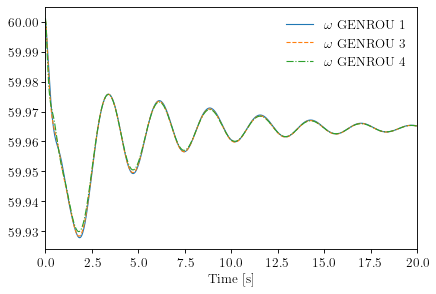

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [21]:
ssa.TDS.load_plotter()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3),
                ytimes=60,
               )

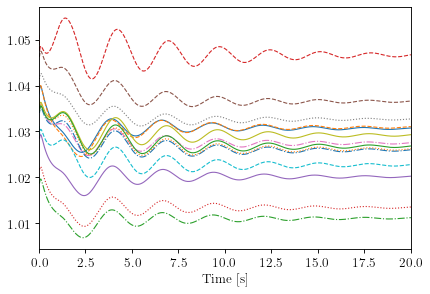

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [22]:
ssa.TDS.plt.plot(ssa.Bus.v)

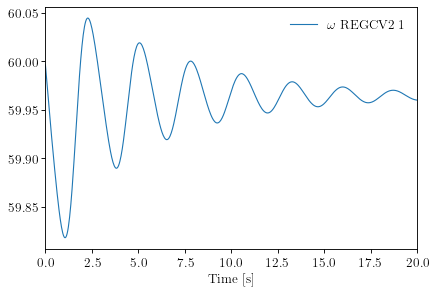

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [23]:
ssa.TDS.plt.plot(ssa.REGCV2.omega,
                ytimes=60,
               )

## Eigenvalue analysis

Singular matrix. Case is not solvable


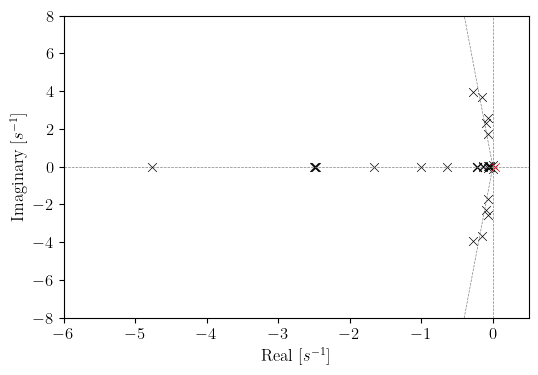

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [24]:
ssa.EIG.run()
ssa.EIG.plot()